In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [124]:
df_drops = pd.read_csv('24drop_size_14 days.csv', delimiter=';')
df_drops.head()

,Area,XM,YM,Unique_ID,Initial droplet size,Initial cell count,Sample,Plate,Location,Area (mm2)
0,64433,1370.063,179.019,S4_5_8000,5.0,8000,5_8000,S4,Corner,119.196276
1,62054,992.734,193.554,S4_5_4000,5.0,4000,5_4000,S4,Edge,114.795302
2,64576,174.512,206.970,S4_5_1000,5.0,1000,5_1000,S4,Corner,119.460815
3,61626,582.885,212.892,S4_5_2000,5.0,2000,5_2000,S4,Edge,114.003534
4,56590,560.237,656.425,S4_4_2000,4.0,2000,4_2000,S4,Mid,104.687307


In [125]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_context("paper", font_scale = 2)
sns.set_style("white")


# Use a serif font for better readability
plt.rcParams['font.family'] = 'arial'

# Set the output file format and resolution for saving the figure
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'pdf'

colors=['green', 'blue','orange', 'red',  'cyan', 'yellow']
sns.set_palette(colors)

C:\Users\Tünde\AppData\Local\Temp\ipykernel_20460\3363043081.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.stripplot(df_drops, x='Initial droplet size', y='Area (mm2)', hue='Initial cell count', ax=axes[1], legend = 'brief', palette = colors, dodge = True, alpha=0.5)


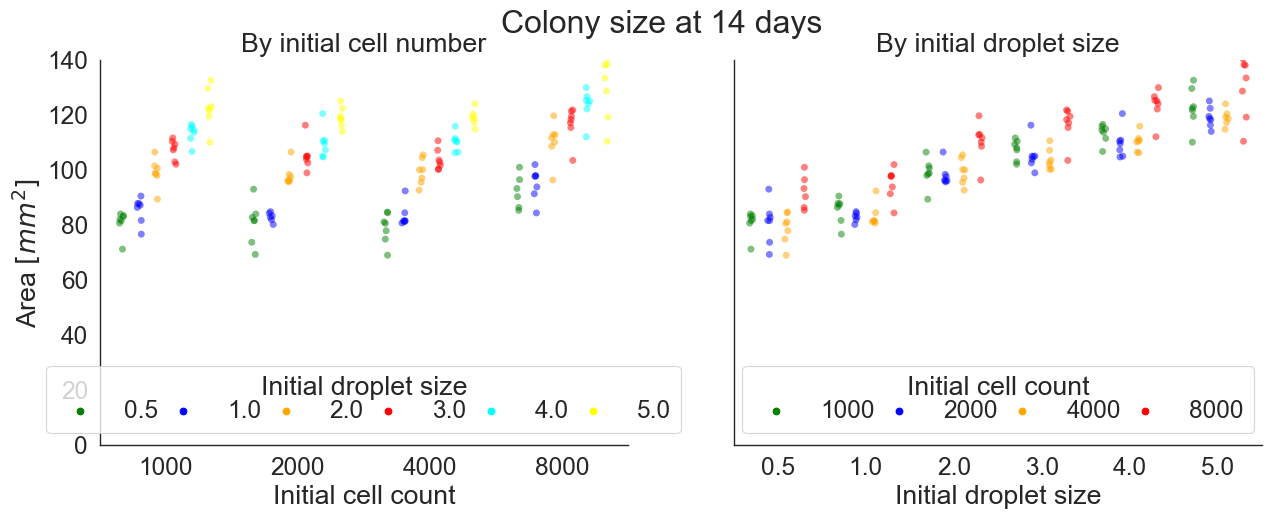

In [126]:
figure, axes = plt.subplots(1, 2, sharey=True,figsize=(15, 5))

figure.suptitle('Colony size at 14 days')
axes[0].set_title('By initial cell number')
axes[1].set_title('By initial droplet size')
sns.stripplot(df_drops, x='Initial cell count', y='Area (mm2)', hue='Initial droplet size',jitter = True, ax=axes[0], legend = 'brief', palette = colors, dodge = True, alpha=0.5)
sns.stripplot(df_drops, x='Initial droplet size', y='Area (mm2)', hue='Initial cell count', ax=axes[1], legend = 'brief', palette = colors, dodge = True, alpha=0.5)

plt.ylim(0,140)
axes[0].set(ylabel='Area $[mm^2]$')
sns.despine()
axes[0].legend(title= 'Initial droplet size',loc='lower center',columnspacing=0,labelspacing=0, ncol = 6)
axes[1].legend(title= 'Initial cell count',loc='lower center',columnspacing=0,labelspacing=0, ncol = 4)
plt.savefig('multidrop14days_v2.svg',  format = 'svg', dpi=300)

In [130]:
# Multivariate linear

scaler = StandardScaler()

x = scaler.fit_transform(df_drops[['Initial cell count','Initial droplet size']])
y = df_drops['Area (mm2)']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
coeffratio = regr.coef_[0] / regr.coef_[1]
r2_multivariate = regr.score(x, y)


#print('For colony size on day', days ,' Intercept: ', regr.intercept_ , 'Coefficients: ', regr.coef_,' Ratio: ', coeffratio, '\n')
print(f"For colony size on day 14 intercept: {regr.intercept_:.2f} Coefficients: ", end="")
print(", ".join([f"{coef:.2f}" for coef in regr.coef_]))
print(f"R-squared for multivariate linear fit: {r2_multivariate:.3f}")

For colony size on day 14 intercept: 102.87 Coefficients: 4.15, 13.94
R-squared for multivariate linear fit: 0.847


In [128]:
# Drop_size_init
x_drop_size = scaler.fit_transform(df_drops[['Initial droplet size']])
regr_drop_size = linear_model.LinearRegression()
regr_drop_size.fit(x_drop_size, y)
r2_drop_size = r2_score(y, regr_drop_size.predict(x_drop_size))

# Cell_num_init
x_cell_num = scaler.fit_transform(df_drops[['Initial cell count']])
regr_cell_num = linear_model.LinearRegression()
regr_cell_num.fit(x_cell_num, y)
r2_cell_num = r2_score(y, regr_cell_num.predict(x_cell_num))

# Cell_num_init excluding 8000

df_ex = df_drops.loc[df_drops['Initial cell count']!=8000]
x_cell_num_ex = scaler.fit_transform(df_ex[['Initial cell count']])
y_ex = df_ex['Area (mm2)']
regr_cell_num_ex = linear_model.LinearRegression()
regr_cell_num_ex.fit(x_cell_num_ex, y_ex)
r2_cell_num_ex = r2_score(y_ex, regr_cell_num_ex.predict(x_cell_num_ex))

# Cell_num_init excluding 8000


x_drop_size_ex = scaler.fit_transform(df_ex[['Initial droplet size']])

regr_drop_size_ex = linear_model.LinearRegression()
regr_drop_size_ex.fit(x_drop_size_ex, y_ex)
r2_drop_size_ex = r2_score(y_ex, regr_drop_size_ex.predict(x_drop_size_ex))



print(f"Coefficients: {', '.join([f'{coef:.2f}' for coef in regr_drop_size.coef_])}, R-squared for Drop size: {r2_drop_size:.2f}")
print(f"Coefficients: {', '.join([f'{coef:.2f}' for coef in regr_cell_num.coef_])}, R-squared for Cell number: {r2_cell_num:.2f}")

print('When excluding colonies inoculated with 8000 cells:')
print(f"Coefficients: {', '.join([f'{coef:.2f}' for coef in regr_drop_size_ex.coef_])}, R-squared for Drop size: {r2_drop_size_ex:.2f}")
print(f"Coefficients: {', '.join([f'{coef:.2f}' for coef in regr_cell_num_ex.coef_])}, R-squared for Cell number: {r2_cell_num_ex:.2f}")
    

Coefficients: 13.98, R-squared for Drop size: 0.78
Coefficients: 4.26, R-squared for Cell number: 0.07
When excluding colonies inoculated with 8000 cells:
Coefficients: 14.02, R-squared for Drop size: 0.89
Coefficients: -1.12, R-squared for Cell number: 0.01


In [129]:
df_ex.head()

,Area,XM,YM,Unique_ID,Initial droplet size,Initial cell count,Sample,Plate,Location,Area (mm2)
1,62054,992.734,193.554,S4_5_4000,5.0,4000,5_4000,S4,Edge,114.795302
2,64576,174.512,206.970,S4_5_1000,5.0,1000,5_1000,S4,Corner,119.460815
3,61626,582.885,212.892,S4_5_2000,5.0,2000,5_2000,S4,Edge,114.003534
4,56590,560.237,656.425,S4_4_2000,4.0,2000,4_2000,S4,Mid,104.687307
6,60255,157.382,667.049,S4_4_1000,4.0,1000,4_1000,S4,Edge,111.467285
